# 大批量生成
1. 读取3000+篇文献，从中选取 400 篇文献
2. 走pipeline数据生成流程

In [1]:
from utils.article_chunks_v2 import read_file_names
data_dir = "data"
filenames = read_file_names(data_dir, ext=".md")
# filenames = filenames[:5]

len(file_names): 3373


In [2]:
from utils.article_filter import get_embedding_batch
filenames_dir = "data"
embeddings = get_embedding_batch(filenames_dir)

len(file_names): 3373
batch 0, total 169, now processing: 20, ['1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md', '10万象素a-Si_TFT有源矩阵的优化技术_徐重阳_llm_correct.md', '10大新显示技术_llm_correct.md', '12.7cm彩色AM-OLED显示器分场驱动研究_沈亮_llm_correct.md', '12.7cm彩色AM-OLED显示屏的驱动模块_张繁_llm_correct.md', '12.9英寸高分辨率多色TFT—LCD_师庆华_llm_correct.md', '125mm彩色AMOLED的多晶硅TFT基板_孟志国_llm_correct.md', '128×64点阵式OLED的驱动电路_董桂芳_llm_correct.md', '13.8英寸高分辨率多色TFT—LCD_王阳_llm_correct.md', '1670万种色彩的15英寸TFT液晶显示_金锐_llm_correct.md', '17.8cm彩色AMOLED驱动模块的研制_尹盛_llm_correct.md', '2-对联苯-8-羟基喹啉锌...及其应用于新型白光OLED_赵婷_llm_correct.md', '2.7”a-Si_TFT矩阵(英文)_熊绍珍_llm_correct.md', '2005_OLED行业一瞥_王力_llm_correct.md', '200mm×200mm_OLED步进投影曝光机_周畅_llm_correct.md', '22cm反射式彩色TFT_LCD_孙再吉_llm_correct.md', '22英寸广色域——HP_L2245w_真水无味_llm_correct.md', '256×64点阵液晶显示器模块_吴训_llm_correct.md', '256级灰度OLED驱动电路_陈志明_llm_correct.md', '2英寸全彩色AM-OLED显示屏的驱动方案_尹盛_llm_correct.md']
batch 1, total 169, now processing: 20, ['3英寸黑白a-siTFT-LCD驱动系统_孙明峰_llm_correct.md', '400×640象素液晶显示的研制_杨

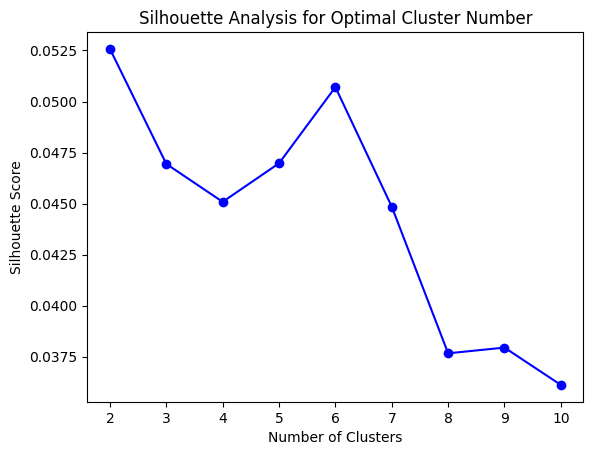

In [ ]:
# 主题聚类分析
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 降维可视化
# pca = PCA(n_components=2)
# vectors_2d = pca.fit_transform(embeddings)

# 寻找最佳聚类数
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制轮廓系数曲线
plt.plot(range_n_clusters, silhouette_scores, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal Cluster Number")
plt.show()

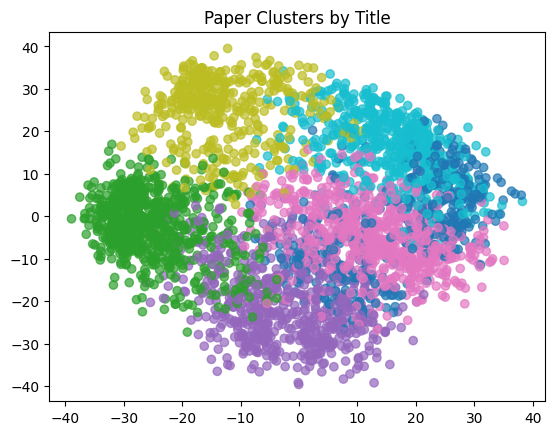

In [ ]:
from sklearn.decomposition import PCA
# 使用最佳聚类数进行最终聚类
optimal_n_clusters = 6
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster = kmeans.fit_predict(embeddings)

# 降维可视化
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(embeddings)

# 可视化聚类结果
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=cluster, cmap='tab10', alpha=0.7)
plt.title("Paper Clusters by Title")
plt.show()

Diversity: 0.2150


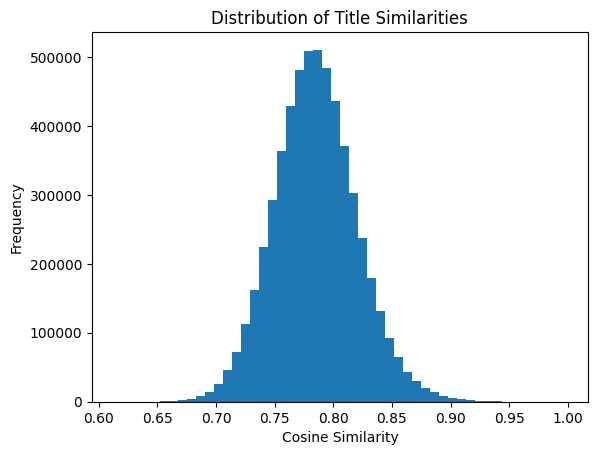

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# 计算标题相似度矩阵
similarity_matrix = cosine_similarity(embeddings)
# 
avg_similarity = np.mean(similarity_matrix)
diversity = 1 - avg_similarity
print(f"Diversity: {diversity:.4f}")
# 相似度分布可视化
plt.hist(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)], bins=50)
plt.title("Distribution of Title Similarities")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [8]:
len(embeddings), len(embeddings[0])

(3373, 2560)

In [2]:
import pickle

# 假设 embeddings 是一个 Python list，形状为 (3373, 2560)
# 这里模拟一个示例数据
# embeddings = [[float(i + j) for j in range(2560)] for i in range(3373)]

# 打印原始数据的形状
# print(f"原始数据形状: len(embeddings)={len(embeddings)}, len(embeddings[0])={len(embeddings[0])}")

# 保存 embeddings 到文件
def save_embeddings_pickle(embeddings, file_path):
    """使用 pickle 保存 embeddings"""
    with open(file_path, 'wb') as f:
        pickle.dump(embeddings, f)
    print(f"Embeddings 已保存到 {file_path}")

# 从文件加载 embeddings
def load_embeddings_pickle(file_path):
    """使用 pickle 加载 embeddings"""
    with open(file_path, 'rb') as f:
        embeddings = pickle.load(f)
    print(f"从 {file_path} 加载的 embeddings 形状: len={len(embeddings)}, len[0]={len(embeddings[0])}")
    return embeddings

# # 文件路径
# file_path = "embeddings.pkl"

# # 保存 embeddings
# save_embeddings_pickle(embeddings, file_path)

# # 加载 embeddings
# loaded_embeddings = load_embeddings_pickle(file_path)

# # 验证数据是否一致
# assert embeddings == loaded_embeddings, "加载的数据与原始数据不一致"
# print("验证通过: 加载的数据与原始数据一致")

In [3]:
from utils.article_filter import get_embedding_batch, balanced_sample_papers
from utils.article_chunks_v2 import read_file_names
data_dir = "data"
filenames = read_file_names(data_dir, ext=".md")
# 读取文件名和嵌入向量
data_dir = "data"
# embeddings, filenames = get_embedding_batch(data_dir)
# 加载 embeddings
file_path = "embeddings.pkl"
embeddings = load_embeddings_pickle(file_path)
# 改进的平衡抽样方法
selected_papers, selected_clusters, cluster_info = balanced_sample_papers(
    filenames, embeddings, n_clusters=6, total_samples=400, min_samples=20
)

len(file_names): 3373
从 embeddings.pkl 加载的 embeddings 形状: len=3373, len[0]=2560
成功将 397 篇论文标题写入 selected_papers.txt
